# Creating, saving and loading datasets with CSBMs

In [1]:
import multiprocessing
import os
import torch
import numpy as np

from csbm import MultiClassCSBM, FeatureCSBM, StructureCSBM, ClassCSBM, HomophilyCSBM
from measures import mmd_max_rbf, mmd_rbf

In [2]:
np.set_printoptions(precision=4, suppress=True)
torch.set_printoptions(precision=3)
csbm_base = torch.load('./data/csbm/base_01.pt')
csbm_feat = torch.load('./data/csbm/feat_02.pt')

feat_shift = np.load('./feature_shifts/feat_02.npy')
base_shift = np.load('./feature_shifts/base_03.npy')
class_shift = np.load('./feature_shifts/class_08.npy')
zero_shift = np.load('./feature_shifts/zero_07.npy')
hom_shift = np.load('./feature_shifts/hom_09.npy')
struct_shift = np.load('./feature_shifts/struct_04.npy')

In [3]:
import matplotlib.pyplot as plt

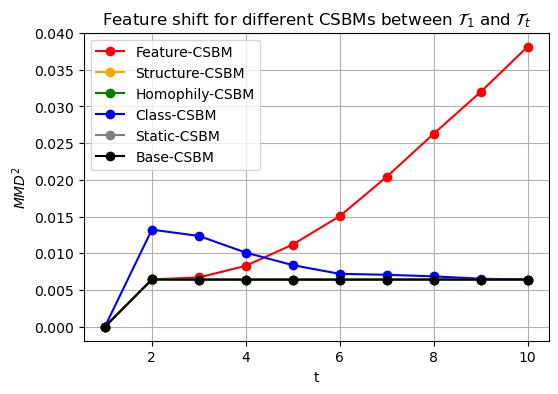

In [9]:
x_values = range(1, len(feat_shift) + 1)

plt.figure(figsize=(6, 4))
plt.plot(x_values, feat_shift, marker='o', color='red', linestyle='-', label='Feature-CSBM')
plt.plot(x_values, struct_shift, marker='o', color='orange', linestyle='-', label='Structure-CSBM')
plt.plot(x_values, hom_shift, marker='o', color='green', linestyle='-', label='Homophily-CSBM')
plt.plot(x_values, class_shift, marker='o', color='blue', linestyle='-', label='Class-CSBM')
plt.plot(x_values, zero_shift, marker='o', color='gray', linestyle='-', label='Static-CSBM')
plt.plot(x_values, base_shift, marker='o', color='black', linestyle='-', label='Base-CSBM')

# Add labels and title
plt.xlabel('t')
plt.ylabel(r'$MMD^{2}$')
plt.title(r'Feature shift for different CSBMs between $\mathcal{T}_{1}$ and $\mathcal{T}_{t}$')
plt.legend()
plt.grid()
# Show the plot
plt.show()